# Scraped Fixtures API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedFixturesAPI/Scraped%20Fixtures%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Fixtures API

The goal of Scraped Fixtures API is to collect and return scraped fixtures by the given filters. This can be done by using the `ScrapedFixturesAPI` class and calling appropriate methods


#### 1. Request by filters

Fixtures can be retrieved for specific filters, by calling the `get_fixtures` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`fixture_ids` List of FixtureIDs

`imos` List of IMOs

`message_ids` List of MessageIDs

`external_message_ids` List of ExternalMessageIDs


`received_date_from` Earliest date the fixture received

`received_date_to` Latest date the fixture received

`updated_date_from` Earliest date the fixture updated

`updated_date_to` Latest date the fixture updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by page token

Fixtures can also be retrieved, by calling the `get_fixtures_incremental` method.
This method will also return `next_request_token`, which the user should use to their next incremental request to retrieve only the latest updated cargoes.


#### Required

`vessel_type` The vessel type

#### Optional

`page_token` The key that should be used as a parameter of the token to retrieve the relevant page.

#### 3. Retrieve page token

The token referenced above can be retrieved for a specific date, by calling the `get_fixtures_incremental_token` method with the following argument:
#### Required

`updated_date_from` Earliest date the fixture updated



### Additional optional arguments

Methods `get_fixtures` and `get_fixtures_incremental`, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, in_line_order, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_vessel_name, scraped_deadweight, scraped_year_built, scraped_laycan, scraped_load, scraped_load2, scraped_discharge, scraped_discharge_options, scraped_discharge2, scraped_charterer, scraped_cargo_type, scraped_quantity, scraped_rate, scraped_rate_options, scraped_delivery_date, scraped_delivery, scraped_redelivery_from, scraped_redelivery_to
```

`include_vessel_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
vessel_name, deadweight, year_built, liquid_capacity, vessel_type_id, vessel_type, vessel_class, commercial_operator_id, commercial_operator
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
load_name, load_taxonomy, load_name2, load_taxonomy2, discharge_name, discharge_taxonomy, discharge_name2, discharge_taxonomy2, charterer, cargo_type, cargo_group, open_geo_name, open_taxonomy, delivery_name, delivery_taxonomy, redelivery_from_name, redelivery_from_taxonomy, redelivery_to_name, redelivery_to_taxonomy, charter_type, fixture_status
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private, is_invalidated, is_partial
```

> Default value is `True` for the arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_fixtures import ScrapedFixturesAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedFixturesAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedFixturesAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker fixtures received the last 2 days, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(days=2)

And then call `get_fixtures` method, as below

In [6]:
scraped_fixtures = api.get_fixtures(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
)

next(iter(scraped_fixtures), None)

ScrapedFixture(fixture_id=151714760, message_id=69800782, external_message_id=None, parsed_part_id=74839673, line_from=26, line_to=26, in_line_order=None, source='Email', updated_date=datetime.datetime(2024, 7, 31, 8, 47, 37, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2024, 7, 31, 8, 45, 37, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_vessel_name=None, scraped_deadweight=None, scraped_year_built=None, imo=9403322, vessel_name='Atlantic T', deadweight=45989, year_built=2009, liquid_capacity=52517, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=88, vessel_class='MR2', commercial_operator_id=1088, commercial_operator='Norden Tanker Pool', scraped_laycan=None, laycan_from=None, laycan_to=None, scraped_load=None, load_geo_id=None, load_name=None, load_taxonomy_id=None, load_taxonomy=None, scraped_load2=None, load_geo_id2=None, load_name2=None, load_taxonomy_id2=None, load_taxonomy2=None, scraped_discharge=None, scraped_discharg

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_fixtures)

df.head()

,fixture_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,fixture_status_id,fixture_status,is_owners_option,is_coa,content,subject,sender,is_private,is_invalidated,is_partial
0,151714760,69800782,None,74839673,26,26,NaN,Email,2024-07-31 08:47:37+00:00,2024-07-31 08:45:37+00:00,...,0.0,OnSubs,False,False,None,BRS CPP MR LIST BSS SPORE - 31/07/24,BRS Group,True,False,True
1,151714761,69800782,None,74839673,9,9,NaN,Email,2024-07-31 08:47:37+00:00,2024-07-31 08:45:37+00:00,...,0.0,OnSubs,False,False,None,BRS CPP MR LIST BSS SPORE - 31/07/24,BRS Group,True,False,True
2,151714762,69800782,None,74839673,35,35,NaN,Email,2024-07-31 08:47:37+00:00,2024-07-31 08:45:37+00:00,...,0.0,OnSubs,False,False,None,BRS CPP MR LIST BSS SPORE - 31/07/24,BRS Group,True,False,True
3,151714763,69800782,None,74839673,28,28,NaN,Email,2024-07-31 08:47:37+00:00,2024-07-31 08:45:37+00:00,...,0.0,OnSubs,False,False,None,BRS CPP MR LIST BSS SPORE - 31/07/24,BRS Group,True,False,True
4,151714764,69800782,None,74839673,38,38,NaN,Email,2024-07-31 08:47:37+00:00,2024-07-31 08:45:37+00:00,...,0.0,OnSubs,False,False,None,BRS CPP MR LIST BSS SPORE - 31/07/24,BRS Group,True,False,True


#### Request by IMOs

To get fixtures for specific vessel(s) by their IMO number(s), you can simple call the `get_fixtures` method for a list of desired IMO(s)

Adding some date argument is always feasible

In [8]:
imos = [9786164,9732929,9510682,9740586,9917892]  # Or add a list of your desired IMOs

scraped_fixtures_by_imos = api.get_fixtures(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
    imos=imos,
)

df_by_imos = pd.DataFrame(scraped_fixtures_by_imos)
df_by_imos.head()

,fixture_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,fixture_status_id,fixture_status,is_owners_option,is_coa,content,subject,sender,is_private,is_invalidated,is_partial
0,151766489,69818876,None,74851203,20,20,None,Email,2024-07-31 11:06:57+00:00,2024-07-31 11:05:23+00:00,...,0,OnSubs,False,False,None,HOWEROB FUJAIRAH MR POSITION LIST - 31TH JULY ...,Howerob,True,False,True
1,151783860,69836061,None,74864037,76,76,None,Email,2024-07-31 14:35:39+00:00,2024-07-31 14:34:19+00:00,...,0,OnSubs,False,False,None,CLARKSONS AG MR LIST DATED 31.07.24,Clarksons,True,False,True
2,151785145,69836593,None,74864427,47,47,None,Email,2024-07-31 14:44:45+00:00,2024-07-31 14:43:18+00:00,...,2,Failed,False,False,high challenge no details failed,harbour. | AG MR CLEAN - Evening fixture report,Harbour Marine,True,False,True
3,151836128,69895515,None,74903725,39,39,None,Email,2024-08-01 07:55:12+00:00,2024-08-01 07:52:29+00:00,...,0,OnSubs,False,False,None,BRS MR POSITION LIST BSS FUJAIRAH - 01.08.2024,BRS Group,True,False,True
4,151840557,69904244,None,74908859,17,17,None,Email,2024-08-01 08:37:29+00:00,2024-08-01 08:36:01+00:00,...,0,OnSubs,False,False,None,HOWEROB SIKKA MR POSITION LIST - 1ST AUGUST 2024,Howerob,True,False,True


#### Request by Message or ExternalMessage IDs

To retrieve fixtures for particular message ID(s), you should include an extra parameter called `message_ids` when using the `get_fixtures` method. This parameter should contain a list of message IDs. For instance,

In [9]:
message_ids = [69293490,69206864,69292355,69292233,69289483]
scraped_fixtures_by_message_ids = api.get_fixtures(
    vessel_type=vessel_type,
    message_ids=message_ids,
)

next(iter(scraped_fixtures_by_message_ids), None)

ScrapedFixture(fixture_id=151241265, message_id=69206864, external_message_id=None, parsed_part_id=74443270, line_from=162, line_to=162, in_line_order=None, source='Email', updated_date=datetime.datetime(2024, 7, 24, 5, 28, 21, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2024, 7, 24, 5, 27, 1, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_vessel_name='vitol tbn', scraped_deadweight=None, scraped_year_built=None, imo=None, vessel_name=None, deadweight=None, year_built=None, liquid_capacity=None, vessel_type_id=0, vessel_type=None, vessel_class_id=None, vessel_class=None, commercial_operator_id=None, commercial_operator=None, scraped_laycan='01-aug', laycan_from=datetime.datetime(2024, 8, 1, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2024, 8, 1, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='quanzhou', load_geo_id=3306, load_name='Quanzhou', load_taxonomy_id=2, load_taxonomy='Port', scraped_load2=None, load_geo

You can achieve a similar result for external message IDs by providing an argument called `external_message_ids`.

#### Request by Fixture IDs

In the same manner, to get data for specific fixtures ID(s), you must call the `get_fixtures` method for a list of desired fixture ID(s).

Date arguments are not available in this method

In [10]:
fixture_ids = [151345310,151345311,151345312,151345313,151345314]  # Or add a list of your desired fixture IDs

scraped_fixtures_by_ids = api.get_fixtures(
    vessel_type=vessel_type,
    fixture_ids=fixture_ids,
)

df_by_ids = pd.DataFrame(scraped_fixtures_by_ids)
df_by_ids.head()

,fixture_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,fixture_status_id,fixture_status,is_owners_option,is_coa,content,subject,sender,is_private,is_invalidated,is_partial
0,151345310,69293490,None,74501355,123,123,1.0,Email,2024-07-24 17:43:06+00:00,2024-07-24 17:40:41+00:00,...,0,OnSubs,False,False,total maersk cayman 35 ulsd 03-04 aug duqm eaf...,Fearnleys Clean Evening Market Report - 24th J...,Fearnleys,True,False,False
1,151345311,69293490,None,74501355,122,122,1.0,Email,2024-07-24 17:43:06+00:00,2024-07-24 17:40:41+00:00,...,0,OnSubs,False,False,st cl huaiyang 35 ulsd 03-04 aug sikka eafr/sa...,Fearnleys Clean Evening Market Report - 24th J...,Fearnleys,True,False,False
2,151345312,69293490,None,74501355,121,121,NaN,Email,2024-07-24 17:43:06+00:00,2024-07-24 17:40:41+00:00,...,0,OnSubs,False,False,reliance torm astrid 35 cpp 02-04 aug sikka uk...,Fearnleys Clean Evening Market Report - 24th J...,Fearnleys,True,False,False
3,151345313,69293490,None,74501355,114,114,1.0,Email,2024-07-24 17:43:06+00:00,2024-07-24 17:40:41+00:00,...,0,OnSubs,False,False,admic high challenge 35 jet 27-29 jul ruwais u...,Fearnleys Clean Evening Market Report - 24th J...,Fearnleys,True,False,False
4,151345314,69293490,None,74501355,115,115,NaN,Email,2024-07-24 17:43:06+00:00,2024-07-24 17:40:41+00:00,...,0,OnSubs,False,False,ats amwaj 35 nap 27-28 jul ag japan ws 177.5 o...,Fearnleys Clean Evening Market Report - 24th J...,Fearnleys,True,False,False


#### Retrieve incremental token
The `get_fixtures_incremental_token` allows retrieval of `page_token` by adding the `updated_date_from` value.
This `page_token` can be used as a variable to the `get_fixtures_incremental` method, in order to retrieve only new or updated fixtures.

For instance, to retrieve the relevant page token for last day's data, you must call the `get_fixtures_incremental_token`, as below

In [11]:
updated_date_from = datetime.utcnow() - timedelta(days=1)
page_token = api.get_fixtures_incremental_token(
    updated_date_from=updated_date_from,
)

page_token

'MjAyNC0wOC0wMVQwODo0MzozNi4wMDBa'

#### Request by page token

If the `page_token` parameter is not specified, the `get_fixtures_incremental` method will retrieve all fixtures. You can call the `get_fixtures_incremental` method, as below


In [12]:
scraped_fixtures_incremental = api.get_fixtures_incremental(
    vessel_type=vessel_type,
    page_token=page_token,
)

df_by_ids = pd.DataFrame(scraped_fixtures_incremental.data)
df_by_ids.head()

,fixture_id,message_id,external_message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,...,fixture_status_id,fixture_status,is_owners_option,is_coa,content,subject,sender,is_private,is_invalidated,is_partial
0,151841295,69907550,None,74910700.0,53.0,53.0,NaN,Email,2024-08-01 08:54:47+00:00,2024-08-01 08:51:53+00:00,...,NaN,None,False,False,dynacom tbn 130kt nhc 28-30/8 ceyhan/vadinar u...,MERIDIAN CRUDE MARKET REPORT 01/08/2024 ** MSG...,Meridian,True,False,False
1,151841296,69907550,None,74910700.0,106.0,106.0,NaN,Email,2024-08-01 08:54:47+00:00,2024-08-01 08:51:53+00:00,...,NaN,None,False,False,teekay tbn 70kt nhc 11/8 caribs/usg ws 135 atm...,MERIDIAN CRUDE MARKET REPORT 01/08/2024 ** MSG...,Meridian,True,False,False
2,151841297,69907550,None,74910700.0,112.0,112.0,NaN,Email,2024-08-01 08:54:47+00:00,2024-08-01 08:51:53+00:00,...,NaN,None,False,False,teekay tbn 70kt nhc 8-9/8 ecm/usg ws 117.5 valero,MERIDIAN CRUDE MARKET REPORT 01/08/2024 ** MSG...,Meridian,True,False,False
3,151841298,69907550,None,74910700.0,105.0,105.0,NaN,Email,2024-08-01 08:54:47+00:00,2024-08-01 08:51:53+00:00,...,NaN,None,False,False,fline tbn 70kt nhc 6-8/8 usg/ukcm ws 135 conoc...,MERIDIAN CRUDE MARKET REPORT 01/08/2024 ** MSG...,Meridian,True,False,False
4,151841299,69907550,None,74910700.0,107.0,107.0,NaN,Email,2024-08-01 08:54:47+00:00,2024-08-01 08:51:53+00:00,...,NaN,None,False,False,north sea 70kt nhc 13-15/8 whiffenhead/ukcm ws...,MERIDIAN CRUDE MARKET REPORT 01/08/2024 ** MSG...,Meridian,True,False,False


Also, the `get_fixtures_incremental` method will retrieve the `next_request_token`, which should be used as the `page_token` for the next incremental call and retrieve only new or updated fixtures.

In [13]:
next_request_token = scraped_fixtures_incremental.next_request_token

next_request_token

'MjAyNC0wOC0wMlQwODo0MzozNi42OTla'

#### Usage of optional arguments

By default, all fields are returned. In many cases, it is convenient to select specific columns. For example, if we want to compare scraped and mapped fields

In [14]:
scraped_mapped_columns = [
    'scraped_vessel_name',
    'vessel_name',
    'scraped_quantity',
    'quantity',
    'scraped_charterer',
    'charterer',
    'scraped_laycan',
    'laycan_from',
    'laycan_to',
]

scraped_mapped_df = pd.DataFrame(scraped_fixtures, columns=scraped_mapped_columns)

scraped_mapped_df.head()

,scraped_vessel_name,vessel_name,scraped_quantity,quantity,scraped_charterer,charterer,scraped_laycan,laycan_from,laycan_to
0,None,Atlantic T,None,NaN,None,None,None,NaT,NaT
1,None,Sea Spike,None,NaN,None,None,None,NaT,NaT
2,None,Yong Ao,None,NaN,None,None,None,NaT,NaT
3,None,STI Bronx,None,NaN,None,None,None,NaT,NaT
4,None,Torm Lotte,None,NaN,None,None,None,NaT,NaT


## Examples

Let's start by fetching all tanker fixtures received the last week

In [15]:
example_vessel_type = 1  # Tanker
example_date_from = datetime.utcnow() - timedelta(days=7)

example_scraped_fixtures = api.get_fixtures(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped fixtures

The `is_deleted` property of a scraped fixture indicates whether it is valid or not. If it is set to `True`, the corresponding `fixture_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped fixtures in the following examples.

In [16]:
example_scraped_fixtures = [fixture for fixture in example_scraped_fixtures if not fixture.is_deleted]

next(iter(example_scraped_fixtures), None)

ScrapedFixture(fixture_id=151440093, message_id=69453094, external_message_id=None, parsed_part_id=74606440, line_from=17, line_to=17, in_line_order=None, source='Email', updated_date=datetime.datetime(2024, 7, 26, 9, 10, 2, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2024, 7, 26, 9, 8, 58, tzinfo=datetime.timezone.utc), is_deleted=False, low_confidence=False, scraped_vessel_name='cardiff tbn', scraped_deadweight=None, scraped_year_built=None, imo=None, vessel_name=None, deadweight=None, year_built=None, liquid_capacity=None, vessel_type_id=0, vessel_type=None, vessel_class_id=None, vessel_class=None, commercial_operator_id=None, commercial_operator=None, scraped_laycan='10-aug', laycan_from=datetime.datetime(2024, 8, 10, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2024, 8, 10, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='bashayer', load_geo_id=3782, load_name='Bashayer', load_taxonomy_id=2, load_taxonomy='Port', scraped_load2=None, load_ge

Now, we are ready to insert our data into a dataframe and keep only specific fields

In [17]:
example_columns = [
    'imo',
    'charterer',   
    'laycan_from',
    'load_name',
    'is_deleted',
]

data = pd.DataFrame(example_scraped_fixtures, columns=example_columns).astype({'imo': 'Int64'})

data.head()

,imo,charterer,laycan_from,load_name,is_deleted
0,<NA>,None,2024-08-10 00:00:00+00:00,Bashayer,False
1,9305611,Heritage Petroleum,2024-08-07 00:00:00+00:00,Ceyhan,False
2,9449405,Shell,2024-08-11 00:00:00+00:00,Nigeria,False
3,9305623,Heritage Petroleum,2024-08-07 00:00:00+00:00,Ceyhan,False
4,9749556,ENI,2024-08-04 00:00:00+00:00,US Gulf,False


#### Top 10 Charterers

In this example, we will find the top 10 Charterers, based on the number of distinct voyages

In [18]:
top_chrtr_ser = data[['charterer', 'imo']].drop_duplicates().charterer.value_counts().head(10)

top_chrtr_df = top_chrtr_ser.to_frame(name='FixtureCount').reset_index().rename(columns={'index': 'Charterer'})

top_chrtr_df

,charterer,FixtureCount
0,Aramco Trading Company,69
1,Total,48
2,BP,45
3,Vitol,43
4,Shell,41
5,Unipec,34
6,Chevron,31
7,Reliance,29
8,ExxonMobil,29
9,Abu Dhabi National Oil Company,28


And display results in a bar plot

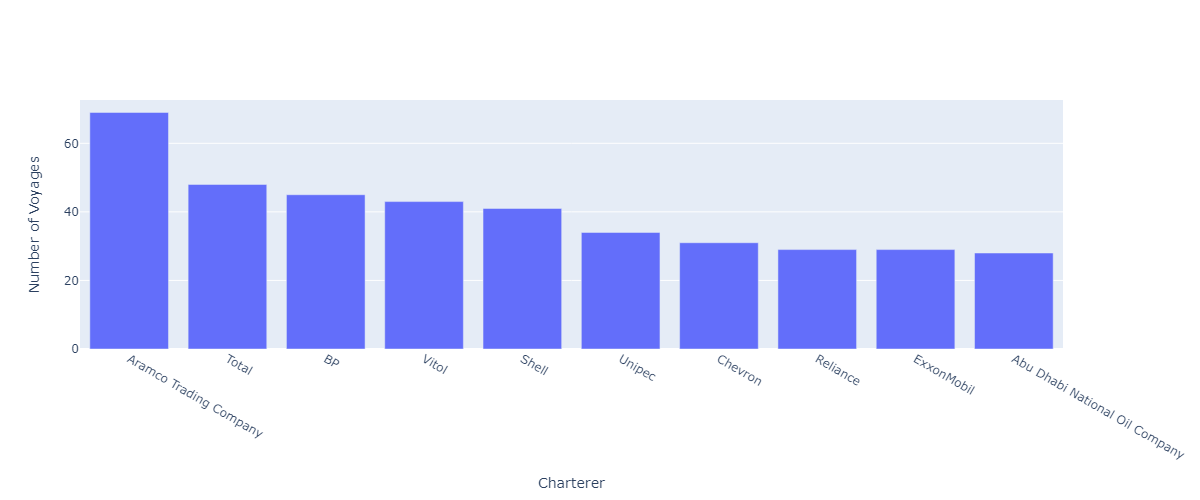

In [19]:
top_chrtr_fig = go.Figure()

bar = go.Bar(
    x=top_chrtr_df.charterer.tolist(),
    y=top_chrtr_df.FixtureCount.tolist(),
)

top_chrtr_fig.add_trace(bar)
top_chrtr_fig.update_xaxes(title_text="Charterer")
top_chrtr_fig.update_yaxes(title_text="Number of Voyages")
top_chrtr_fig.show()

#### Vessels loading in specific areas

In this example, we will create a visualization, for the number of distinct vessels loading in specific areas per day over the next week

In [20]:
this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')
areas = data[data.load_name.notna()].load_name.value_counts().head().index.tolist()

areas

['Arabian Gulf', 'US Gulf', 'Sikka', 'Singapore', 'Korea, Republic of']

Create the pivot table

In [21]:
areas_mask = data.load_name.isin(areas) & data.laycan_from.isin(this_week_days)

df_areas = data[areas_mask]

df_pivot = pd.pivot_table(
    df_areas,
    columns='load_name',
    index='laycan_from',
    values='imo',
    aggfunc=pd.Series.nunique,
    fill_value=0,
).reindex(index=this_week_days, fill_value=0).reset_index().rename(columns={'index': 'laycan_from'})

df_pivot

load_name,laycan_from,Arabian Gulf,"Korea, Republic of",Sikka,Singapore,US Gulf
0,2024-08-02 00:00:00+00:00,6,1,4,3,14
1,2024-08-03 00:00:00+00:00,5,5,1,2,19
2,2024-08-04 00:00:00+00:00,8,0,5,1,6
3,2024-08-05 00:00:00+00:00,10,1,7,2,15
4,2024-08-06 00:00:00+00:00,12,1,4,4,15
5,2024-08-07 00:00:00+00:00,11,1,4,0,4
6,2024-08-08 00:00:00+00:00,13,4,3,4,5


And display the results as timeseries

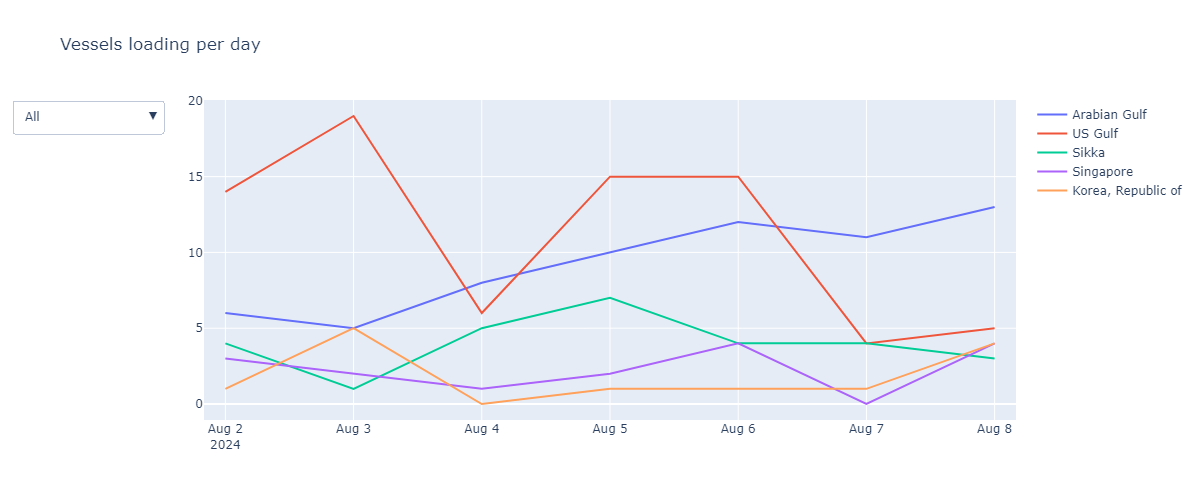

In [22]:
def area_button(area):
    args = [
        {'visible': [i == areas.index(area) for i in range(len(areas))]},
        {
            'title': f'Vessels loading in {area} per day',
            'showlegend': True
        },
    ]
    
    return dict(
        label=area,
        method='update',
        args=args,
    )

title = 'Vessels loading per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

areas_fig = go.Figure()

area_buttons = []

for area in areas:
    if area not in df_pivot.columns:
        continue
    area_scatter_plot = go.Scatter(    
        x=df_pivot.laycan_from,
        y=df_pivot[area],
        name=area,
        mode='lines',
    )

    areas_fig.add_trace(area_scatter_plot)
    
    area_buttons.append(area_button(area))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(areas))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *area_buttons,
])

areas_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

areas_fig.show()

#### Export data to csv

In [23]:
output_path = '' # Change output_path with your path
filename = 'last_week_fixtures.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)